In the first part, the focus will be on learning with a generalised delta rule for a two-layer perceptron. The generalised delta rule is also known as the error back-propagation algorithm or simply "backprop".

## MLP Implementation

-------------

In [335]:
import numpy as np

check the e!!!

In [336]:
# e = 2.718281828459045
# class TwoLayerPerceptron:
#     def __init__(self, learning_rate, n_hidden, mean=0.0, std_dev=1.0):
#         self.W = np.random.randn(n_hidden, 3) * std_dev + mean
#         self.V = np.random.randn(1, n_hidden) * std_dev + mean      
#         # self.W = np.ones((n_hidden, 3))
#         # self.W = np.ones((n_hidden, 3))
#         # self.V = np.ones((1, n_hidden))

#         # self.V = np.ones((1, n_hidden))
#         self.learning_rate = learning_rate
#         self.epochs = 0

#     def activation_function(self, input):
#         denominator = 1 + np.power(e, (-1) * input)

#         eps = 0.0001
        
#         denominator = np.clip(denominator, eps, None)
        
#         return (2 / denominator) - 1
    
#     def grad(self, input):
#         act_input = self.activation_function(input)
#         return ((1 + act_input)*(1 - act_input) / 2)
    
#     def backprop_update(self, x, t):
#         # forward pass
#         hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
#         hout = self.activation_function(hin)                # (n_hidden, n_samples)

#         oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
#         out = self.activation_function(oin)                 # (1, n_samples)
        
#         # backward pass
#         delta_o = (out - t) * self.grad(oin)                # element-wise product -> (1, n_samples)
#         delta_h = (self.V.T @ delta_o) * self.grad(hin)     # (n_hidden, 1) x (1, n_samples) = (n_hidden, n_samples)
#         delta_h = delta_h[1,:]                              # togli bias


#         # weight update
#         dW = (-1) * self.learning_rate * (delta_h @ x.T)    # (n_hidden, n_samples) x (n_samples, 3) = (n_hidden, 3)
#         dV = (-1) * self.learning_rate * (delta_o @ hout.T)   # (1, n_samples) x (n_samples, n_hidden) = (1, n_hidden)

#         self.W += dW
#         self.V += dV
    
#     def fit(self, x, t, n_epochs):
#         for _ in range(n_epochs):
#             self.backprop_update(x, t)
#             self.epochs += 1

#     def predict(self, x):
#         # forward pass
#         hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
#         hout = self.activation_function(hin)                # (n_hidden, n_samples)

#         oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
#         out = self.activation_function(oin)                 # (1, n_samples)

#         return out

In [337]:
from math import e
class TwoLayerPerceptron:
    def __init__(self, learning_rate, n_hidden, mean=0.0, std_dev=1.0):
        # self.W = np.random.randn(n_hidden, 2 + 1) * std_dev + mean
        # self.V = np.random.randn(1, n_hidden + 1) * std_dev + mean          # un peso per input layer, +1 per il bias!!  
        self.W = np.ones((n_hidden, 2+1))
        self.V = np.ones((1, n_hidden+1))

        self.learning_rate = learning_rate
        self.epochs = 0

    def activation_function(self, input):
        denominator = 1 + np.power(1/e, input)
        
        return (2 / denominator) - 1
    
    def grad(self, input):
        act_input = self.activation_function(input)
        return ((1 + act_input)*(1 - act_input) / 2)
    
    def backprop_update(self, x, t):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)  [x ha già il bias]
        hout = self.activation_function(hin)                # (n_hidden, n_samples)
        hout = np.vstack((np.ones(hout.shape[1]), hout))    # (n_hidden + 1, n_samples)

        oin = self.V @ hout                                 # (1, n_hidden + 1) x (n_hidden + 1, n_samples) = (1, n_samples)
        out = self.activation_function(oin)                 # (1, n_samples)
        
        # backward pass
        delta_o = (out - t) * self.grad(oin)                # element-wise product -> (1, n_samples)
        delta_h = (self.V.T @ delta_o) * self.grad(hout)     # (n_hidden + 1, 1) @ (1, n_samples) * (n_hidden, n_samples) = (n_hidden + 1, n_samples)
        delta_h = delta_h[1:,:]                              # togli bias -> (n_hidden, n_samples)


        # weight update
        dW = (-1) * self.learning_rate * (delta_h @ x.T)      # ((n_hidden, n_samples) @ (n_samples, 3)) = (n_hidden, 3)
        dV = (-1) * self.learning_rate * (delta_o @ hout.T)   # (1, n_samples) x (n_samples, n_hidden) = (1, n_hidden)

        self.W += dW
        self.V += dV
    
    def fit(self, x, t, n_epochs):
        for _ in range(n_epochs):
            self.backprop_update(x, t)
            self.epochs += 1

    def predict(self, x):
        # forward pass
        hin = self.W @ x                                    # (n_hidden, 3) x (3 x n_samples)
        hout = self.activation_function(hin)                # (n_hidden, n_samples)
        hout = np.vstack((np.ones(hout.shape[1]), hout))    # (n_hidden + 1, n_samples)


        oin = self.V @ hout                                 # (1, n_hidden) x (n_hidden, n_samples) =
        out = self.activation_function(oin)                 # (1, n_samples)

        return out

### Part 3.1.1 - Classification of linearly non-separable data

The goal is to examine how well a two-layer perceptron trained with backprop performs in separating the two classes.

-----------

In [338]:
import numpy as np

ndata = 100
# mA = np.array([1.0, 0.3])
mA = np.array([1.0, 0.3])

sigmaA = 0.1
mB = np.array([0.0, 0.4])
sigmaB = 0.15

# Generating data for class A
half_ndata = int(0.5 * ndata)
classA = np.zeros((2, ndata))
classA[0, :half_ndata] = np.random.randn(half_ndata) * sigmaA - mA[0]
classA[1, :half_ndata] = np.random.randn(half_ndata) * sigmaA + mA[1]
classA[0, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[0]
classA[1, half_ndata:] = np.random.randn(half_ndata) * sigmaA + mA[1]

# Generating data for class B
classB = np.zeros((2, ndata))
classB[0, :] = np.random.randn(ndata) * sigmaB + mB[0]
classB[1, :] = np.random.randn(ndata) * sigmaB + mB[1]

In [339]:
classA = np.vstack((classA, - np.ones(ndata)))
classB = np.vstack((classB, np.ones(ndata)))

In [340]:
classA[:,:5]

array([[-1.06779876, -0.95603433, -0.81062101, -1.07962562, -1.08781177],
       [ 0.43794452,  0.46691848,  0.45040054,  0.23000794,  0.43081589],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [341]:
classB[:,:5]

array([[ 0.12874788,  0.0799142 , -0.05363851, -0.21034003,  0.14956489],
       [ 0.55052363,  0.56638311,  0.51380607,  0.55640595,  0.35665101],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

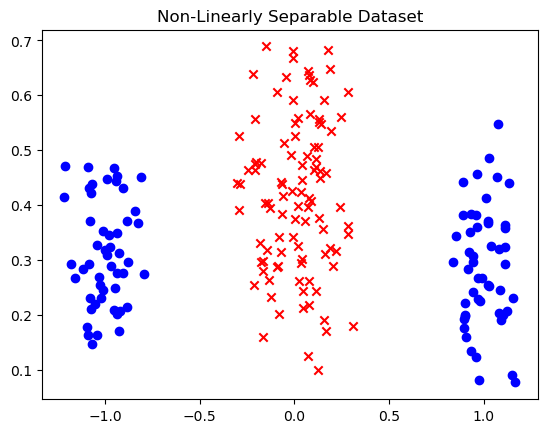

In [342]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(classA[0,:], classA[1,:], c='b', label='a', marker='o')
plt.scatter(classB[0,:], classB[1,:], c='r', label='b', marker='x')
plt.show()

### Experiment 1:
Modify the number of hidden nodes and demonstrate the effect the size of the hidden layer has on the performance (both the mean squared error and the number/ratio of misclassifications). How many hidden nodes do you need to perfectly separate all the available data (if manageable at all given your data randomisation)?

---------------

bias

In [343]:
dataset = np.vstack((np.ones(2*ndata), np.hstack((classA, classB))))
dataset[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-1.06779876, -0.95603433, -0.81062101, -1.07962562, -1.08781177],
       [ 0.43794452,  0.46691848,  0.45040054,  0.23000794,  0.43081589],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

shuffle

In [344]:
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.0716691 , -1.09064098,  1.08073923,  0.91932071, -0.95461306],
       [ 0.31412757,  0.16302108,  0.20392778,  0.28360214,  0.20835615],
       [ 1.        , -1.        , -1.        , -1.        , -1.        ]])

split

In [345]:
X_train = dataset[:3,:]
y_train = dataset[3,:]

*Let's try with 4 hidden layers*

In [346]:
perceptron_classifier = TwoLayerPerceptron(0.05, 2)

In [347]:
mse = []
accuracies = []

In [348]:
perceptron_classifier.epochs

0

In [349]:
perceptron_classifier.epochs

0

In [350]:
for _ in range(2000):
    perceptron_classifier.fit(X_train, y_train, 1)
    p = perceptron_classifier.predict(X_train)

    # MSE
    mse.append(np.sum((y_train - p)**2 / len(y_train)))

    # accuracy
    predictions = 2*(np.array(p > 0, dtype=int)) - 1
    accuracies.append(np.sum(predictions == y_train) / len(y_train))

perceptron_classifier.epochs

2000

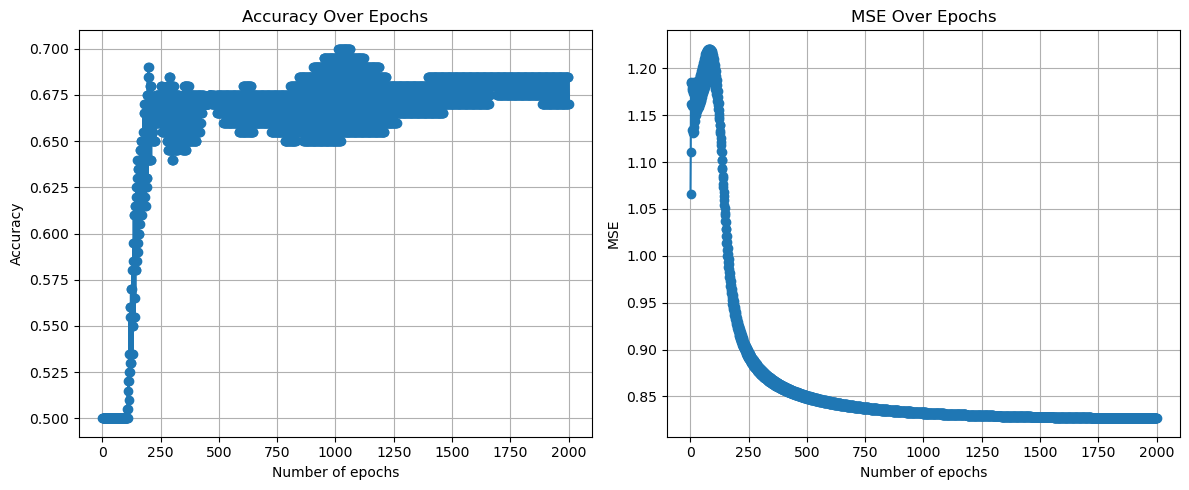

In [351]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies) + 1)
ax1.plot(x_values, accuracies, marker='o', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse) + 1)
ax2.plot(x_values, mse, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


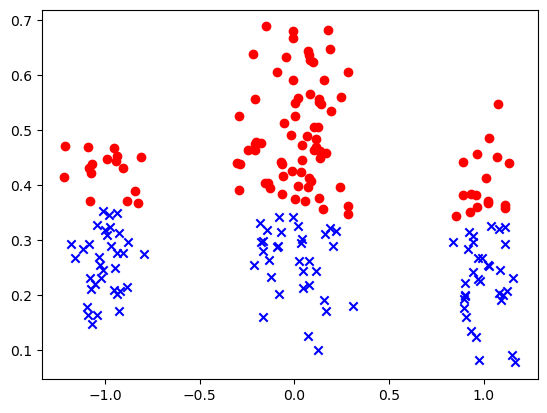

In [352]:
p = perceptron_classifier.predict(X_train)
predictions = 2*(np.array(p > 0, dtype=int)) - 1

pred_pos = (predictions == 1)
pred_neg = (predictions == -1)

plt.scatter(X_train[1, pred_pos[0,:]], X_train[2,pred_pos[0,:]], c='r', label='a', marker='o')
plt.scatter(X_train[1, pred_neg[0,:]], X_train[2, pred_neg[0,:]], c='b', label='b', marker='x')

plt.show()

*How many hidden nodes do we need to perfectly classify all the points?*

In [353]:
final_accuracies = []
final_mse = []
for n in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    pc = TwoLayerPerceptron(0.05, n)
    for _ in range(2000):
        pc.fit(X_train, y_train, 1)
    p = pc.predict(X_train)
    
    predictions = 2*(np.array(p > 0, dtype=int)) - 1

    final_accuracies.append(np.sum(predictions == y_train) / len(y_train))
    final_mse.append(np.sum((y_train - p)**2 / len(y_train)))


print(final_accuracies)
print(final_mse)

[0.67, 0.67, 0.665, 0.665, 0.75, 0.75, 0.75, 0.75, 0.75]
[0.8269828768972587, 0.8225895573554232, 0.8205377177380124, 0.8193482132333103, 1.0000275395744105, 1.0000262089715632, 1.0000253693118237, 1.0000247607873298, 1.0000242636709153]


ANSWER: it looks like there is no right number of hidden nodes to correctly classify all the points generated: the answer depends mostly on the dataset (at least with so limited amount of samples). Also we should monitor training more accurately in order to have guarantees convergence is reached.

### Experiment 2:
Then, formulate a more realistic problem where only a subset of data points is available for training a network (data you use to calculate weight updates using backprop) and the remaining samples constitute a validation dataset for probing generalisation capabilites of the network. To do that, subsample the data for training according to the following scenarios:
- random 25% from each class
- random 50% from class A
- 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

Treat the removed samples as a validation set. Make sure you do not use this hold-out set in the training process and instead you only use it to
calculate the error (mean squared error or the ratio of misclassifications) at different stages/epochs of learning to monitor the progress.

#### Scenario 1

In [354]:
classA_train = classA[:,:75]
classA_holdout = classA[:,75:]

classB_train = classB[:,:75]
classB_holdout = classB[:,75:]

classA_train.shape, classA_holdout.shape, classB_train.shape, classB_holdout.shape

((3, 75), (3, 25), (3, 75), (3, 25))

In [355]:
train = np.vstack((np.ones(150), np.hstack((classA_train, classB_train))))
rng.shuffle(train, axis=1)
X_train = train[:3, :]
y_train = train[3, :]

holdout = np.vstack((np.ones(50), np.hstack((classA_holdout, classB_holdout))))
rng.shuffle(holdout, axis=1)
X_holdout = holdout[:3, :]
y_holdout = holdout[3, :]

X_train.shape, y_train.shape, X_holdout.shape, y_holdout.shape

((3, 150), (150,), (3, 50), (50,))

In [356]:
size_hidden = 4

In [357]:
perceptron_classifierZ = TwoLayerPerceptron(0.001, size_hidden)

#### Training

In [358]:
mse_train = []
accuracies_train = []

mse_validation = []
accuracies_validation = []


In [359]:
for _ in range(1000):
    perceptron_classifierZ.fit(X_train, y_train, 1)

    p_train = perceptron_classifierZ.predict(X_train)
    p_validation = perceptron_classifierZ.predict(X_holdout)

    if (e % 50 == 0):
        print(np.sum(np.array(p_validation > 0, dtype=int)))

    # MSE
    mse_train.append(np.sum((y_train - p_train)**2 / len(y_train)))
    mse_validation.append(np.sum((y_holdout - p_validation)**2 / len(y_holdout)))

    # accuracy
    predictions_train = 2*(np.array(p_train > 0, dtype=int)) - 1
    accuracies_train.append(np.sum(predictions_train == y_train) / len(y_train))

    predictions_validation = 2*(np.array(p_validation > 0, dtype=int)) - 1
    accuracies_validation.append(np.sum(predictions_validation == y_holdout) / len(y_holdout))



In [360]:
len(accuracies_train), len(accuracies_validation)

(1000, 1000)

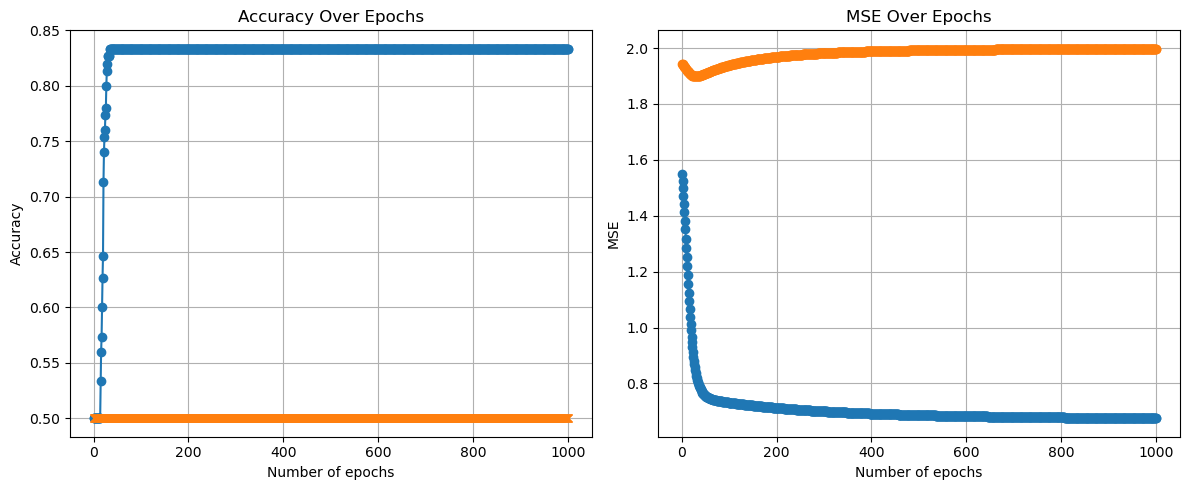

In [361]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph
x_values = range(1, len(accuracies_train) + 1)
ax1.plot(x_values, accuracies_train, marker='o', linestyle='-')
ax1.plot(x_values, accuracies_validation, marker='x', linestyle='-')
ax1.set_xlabel('Number of epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.grid(True)

# Plot the second graph
x_values = range(1, len(mse_train) + 1)
ax2.plot(x_values, mse_train, marker='o', linestyle='-')
ax2.plot(x_values, mse_validation, marker='o', linestyle='-')
ax2.set_xlabel('Number of epochs')
ax2.set_ylabel('MSE')
ax2.set_title('MSE Over Epochs')
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Validation